# Data Science Fundamentals 5

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Science IT Support, University Of Bern, 2020

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 4.

In [0]:
from matplotlib import  pyplot as plt
import numpy as np
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

# 1. Classification with neural network

## 1. Bulding a neural network

The following creates a 'model'. It is an object containing the ML model itself - a simple 3-layer fully connected neural network, optimization parameters, as well as tha interface for model training.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model summary provides information about the model's layers and trainable parameters

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## 2. Model training

The `fit` function is the interface for model training. 
Here one can specify training and validation datasets, minibatch size, and the number of training epochs.

We will also save the state of the trainable variables after each epoch: 

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
save_path = 'save/mnist_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model.fit(x=x_train, y=y_train,
                 epochs=50, batch_size=128, 
                 validation_data=(x_test, y_test),
                 callbacks=[save_callback])

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.7405 - accuracy: 0.7562 - val_loss: 0.5751 - val_accuracy: 0.8082
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.5167 - accuracy: 0.8271 - val_loss: 0.5181 - val_accuracy: 0.8265
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4745 - accuracy: 0.8400 - val_loss: 0.4971 - val_accuracy: 0.8298
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.4522 - accuracy: 0.8475 - val_loss: 0.4765 - val_accuracy: 0.8357
Epoch 5/50
296/469 [=================>............] - ETA: 0s - loss: 0.4402 - accuracy: 0.8518

KeyboardInterrupt: ignored

NameError: ignored

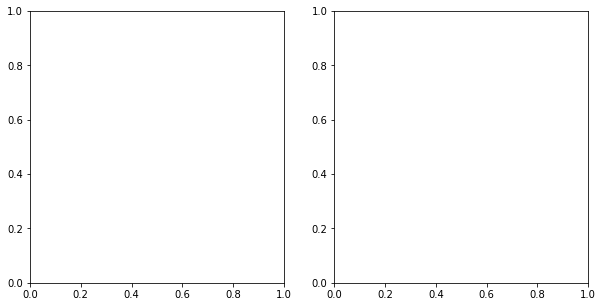

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

Current model performance can be evaluated on a dataset:

In [0]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.4719 - accuracy: 0.8365


[0.4718625843524933, 0.8364999890327454]

We can test trained model on a image:

true lablel:  9 ; predicted:  9 (Ankle boot)


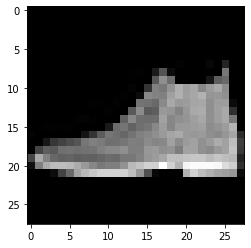

In [0]:
im_id = 0
y_pred = model(x_test)

y_pred_most_probable = np.argmax(y_pred[im_id])
print('true lablel: ', y_test[im_id],
      '; predicted: ',  y_pred_most_probable,
      f'({class_names[y_pred_most_probable]})')
plt.imshow(x_test[im_id], cmap='gray');

As well as inspect on which samples does the model fail:

true lablel:  7 (Sneaker) ; predicted:  5 (Sandal)


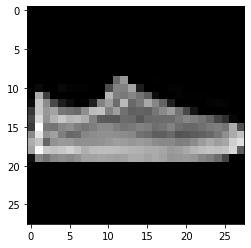

In [0]:
y_pred_most_probable_all = np.argmax(y_pred, axis=1)
wrong_pred_map = y_pred_most_probable_all!=y_test
wrong_pred_idx = np.arange(len(wrong_pred_map))[wrong_pred_map]

im_id = wrong_pred_idx[0]

y_pred_most_probable = y_pred_most_probable_all[im_id]
print('true lablel: ', y_test[im_id],
      f'({class_names[y_test[im_id]]})',
      '; predicted: ',  y_pred_most_probable,
      f'({class_names[y_pred_most_probable]})')
plt.imshow(x_test[im_id], cmap='gray');

## 3. Loading trained model

In [0]:
model.load_weights('save/mnist_1.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

model.load_weights('save/mnist_12.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

model.load_weights('save/mnist_18.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.5751 - accuracy: 0.8082


NotFoundError: ignored

## 4. Inspecting trained variables

We can obtain the trained variables from model layers:

In [0]:
l = model.get_layer(index=1)
w, b = l.weights

w = w.numpy()
b = b.numpy()
print(w.shape, b.shape)
w = w.reshape((28,28,-1)).transpose((2, 0, 1))

(784, 10) (10,)


Let's visualize first 5:

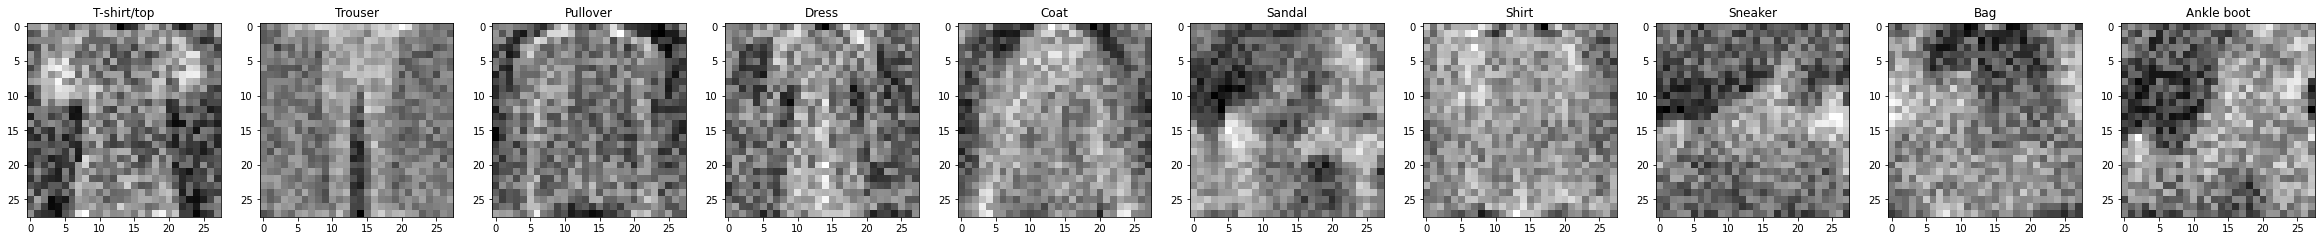

In [0]:
n = 10
fig, axs = plt.subplots(1, n, figsize=(4.1*n,4))
for i, wi in enumerate(w[:n]):
  axs[i].imshow(wi, cmap='gray')
  axs[i].set_title(class_names[i])

## 6. Inspecting gradients

We can also evaluate the gradients of each output with respect to an input:

In [0]:
idx = 111
inp_v = x_train[idx:idx+1]  # use some image to compute gradients with respect to

inp = tf.constant(inp_v)  # create tf constant tensor
with tf.GradientTape() as tape:  # gradient tape for gradint evaluation
  tape.watch(inp)  # take inp as variable
  preds = model(inp) # evaluate model output

grads = tape.jacobian(preds, inp)  # evaluate d preds[i] / d inp[j]
print(grads.shape, '<- (Batch_preds, preds[i], Batch_inp, inp[y], inp[x])')
grads = grads.numpy()[0,:,0]

(1, 10, 1, 28, 28) <- (Batch_preds, preds[i], Batch_inp, inp[y], inp[x])


prediction: 9


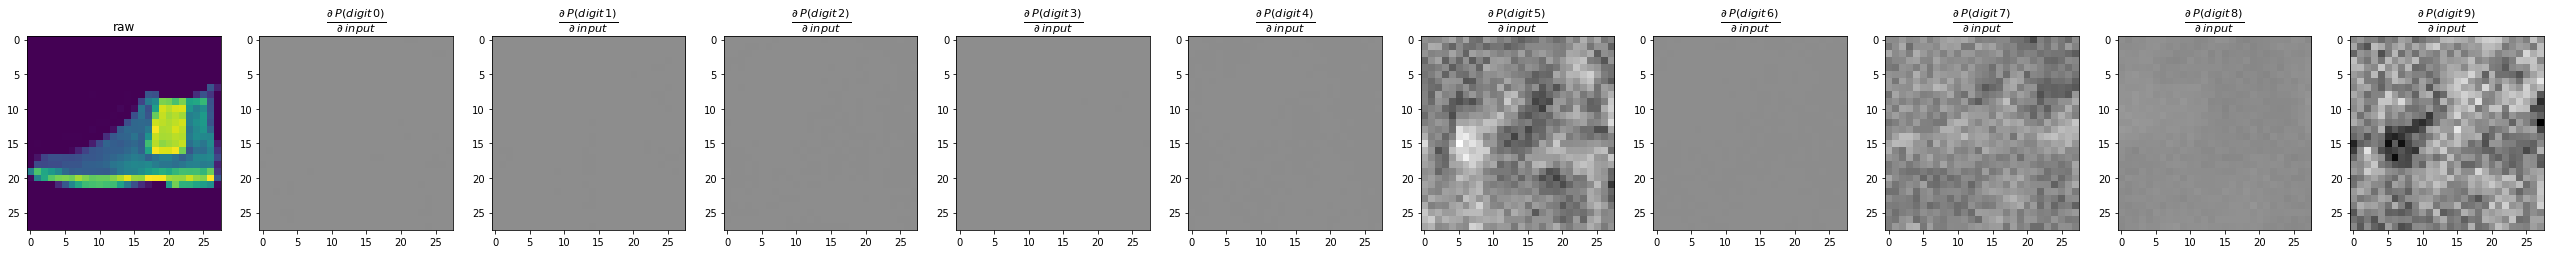

In [0]:
print('prediction:', np.argmax(preds[0]))
fig, axs = plt.subplots(1, 11, figsize=(4.1*11,4))
axs[0].imshow(inp_v[0])
axs[0].set_title('raw')
vmin,vmax = grads.min(), grads.max()
for i, g in enumerate(grads):
  axs[i+1].imshow(g, cmap='gray', vmin=vmin, vmax=vmax)
  axs[i+1].set_title(r'$\frac{\partial\;P(digit\,%d)}{\partial\;input}$' % i, fontdict={'size':16})

## EXERCISE 1:

Make a deeper model, with wider layers. Remember to `'softmax'` activation in the last layer, as required for the classification task to encode pseudoprobabilities. In the other layers you could use `'relu'`.

Try to achieve 90% accuracy.
Does your model overfit?

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1500, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,083,338
Trainable params: 1,083,338
Non-trainable params: 0
_________________________________________________________________


In [0]:
save_path = 'save/mnist_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model.fit(x=x_train, y=y_train,
                 epochs=20, batch_size=128, 
                 validation_data=(x_test, y_test),
                 callbacks=[save_callback])

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4823 - accuracy: 0.8284 - val_loss: 0.4445 - val_accuracy: 0.8397
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3597 - accuracy: 0.8704 - val_loss: 0.3704 - val_accuracy: 0.8650
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3191 - accuracy: 0.8829 - val_loss: 0.3468 - val_accuracy: 0.8749
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2947 - accuracy: 0.8905 - val_loss: 0.3746 - val_accuracy: 0.8687
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2758 - accuracy: 0.8970 - val_loss: 0.3548 - val_accuracy: 0.8762
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2630 - accuracy: 0.9010 - val_loss: 0.3412 - val_accuracy: 0.8800
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2483 - accuracy: 0.9071 - val_loss: 0.3234 - val_accuracy: 0.8832
Epoch 

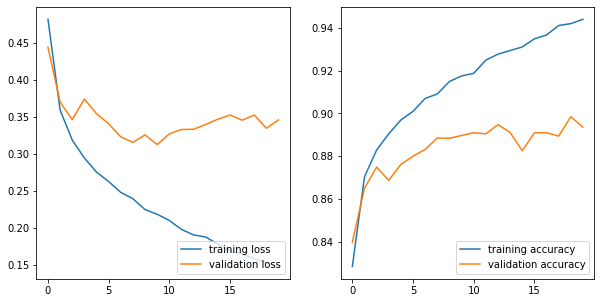

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [0]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3464 - accuracy: 0.8936


[0.3463587462902069, 0.8935999870300293]

# 2. Extras and Q&A